# CSC380 - Homework 7

**INDIVIDUAL HOMEWORK** The homework is not collaborative anymore. Please respect the academic integrity. **Remember: if you get caught on cheating, you get F.**

Each subproblem is worth 10 pts.  All cells are marked with instructions to insert your code.  Please complete all cells as directed.

**What to turn in**:
 -  Please print the notebook containing the answers and results into a pdf file (you can use `File - Print`). Submit this pdf file to the main homework entry in gradescope. Be sure to locate your answers for each problem when you submit, as ususal. In the worst case where you cannot print it into a pdf file somehow, you can create a Microsoft word document and then copy-paste screenshots showing your code and output parts by parts.
 -  You also need to submit this jupyter notebook file filled with your answers in the code entry in gradescope.

**Description**:

This homework will familiarize you with linear regression.  You will be using the *Prostate Cancer Dataset* from a study by Stamey et al. (1989).  The study aims to predict prostate-specific antigen levels from clinical measures in men about to receive a radical prostatectomy.  

The data contain 8 features:
* log cancer volume (lcavol)
* log prostate weight (lweight)
* age (age)
* log amount of benign prostatic hyperplasia (lbph)
* seminal vesicle invasion (svi)
* log of capsular penetration (lcp)
* Gleason score (gleason)
* percent of Gleason scores 4 or 5 (pgg45)

The data use a fixed Train / Test split, which we will load below.

In [9]:
#All finalised needed imports
import pandas as pd
import itertools
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [10]:
df_train = pd.read_csv('prostate_train.csv')
df_train.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


## Problem 1: Your First Regression 
We will begin by fitting our first ordinary least squares regression model.  But first we need to do a little data management.  You will notice that the data exist in a single data frame (one for Train and one for Test).  The last column of the data frame ('lpsa') is the quantity that we wish to predict (the Y-value).  

### (a) 

Do the following in the cell below,
* Create X_train and Y_train by separating out the last column ('lpsa') and store it in Y_train
* Do the same for X_test and Y_test
* Display the DataFrame X_train

In [11]:
features = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
output = ['lpsa']
X_train = df_train[features]
Y_train = df_train[output]
X_train.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0


### (b)

Now we will fit our first model using a single feature ('lcavol').  Do the following in the cell below,
* Train a linear regression model on the 'lcavol' feature
* Compute the R-squared score of the model on the training data
* Scatterplot the training data for the 'lcavol' feature
* Plot the regression line over the scatterplot 
* Label the plot axis / title and report the R-squared score

A couple of notes:
* Scikit-learn gets cranky when you pass in single features.  In some versions you will need to use, X_train['lcavol'].values.reshape(-1, 1)
* To plot the regression line you can create a dense grid of points using numpy.arange, between the min() and max() of the feature values.

[Documentation - Scikit-Learn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

R-squared:  0.5375164690552882


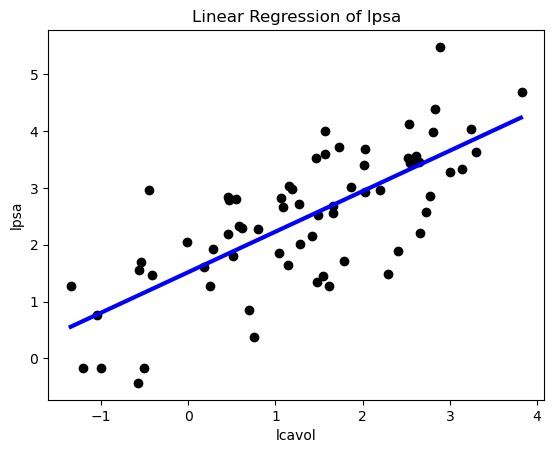

In [12]:
# Fit one feature
lr = linear_model.LinearRegression()
lr.fit(X_train['lcavol'].values.reshape(-1, 1), Y_train)
r2 = lr.score(X_train['lcavol'].values.reshape(-1, 1), Y_train)
print('R-squared: ', r2)

# plot
x = np.arange(X_train['lcavol'].min(), X_train['lcavol'].max(), 0.01)
y = lr.predict(x.reshape(-1,1))
plt.scatter(X_train['lcavol'], Y_train, color='black')
plt.plot(x, y, color='blue', linewidth=3)
plt.xlabel('lcavol')
plt.ylabel('lpsa')
plt.title('Linear Regression of lpsa')
plt.show()

## Problem 2: Best Subset Feature Selection
Now we will look at finding the best subset of features out of all possible subsets.  To do this, you will implement the Best Feature Subset Selection as presented in lecture (see lecture slides).  We will break this into subproblems to walk through it.  To help you with this we have provided a function findsubsets(S,k).  When passed a set S this function will return a set of all subsets of size k, which you can iterate through to train models.

In [13]:
def findsubsets(S,k):
    return set(itertools.combinations(S, k))

### (a)

We will start by getting familiar with the findsubsets() function.  The variable 'features' was defined previously as a set of all feature names.  In the cell do the following:
* Use findsubsets to find all possible subsets of 3 features
* Perform 5-fold cross validation to train a LinearRegression model on each set of 3 features
* Find the model with the highest average $R^2$ score (scoring='r2')
* Report the best performing set of features and the corresponding $R^2$ score

[Documentation - Scikit-Learn - cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)


In [14]:
subsets3 = findsubsets(features, 3)
best_score3 = -np.Inf
best_features3 = []
for feats in subsets3:
  this_X = X_train[list(feats)]
  cvs = cross_val_score(linear_model.LinearRegression(), 
                             this_X, Y_train, cv=5, scoring='r2')
  this_score = cvs.mean()
  if this_score > best_score3:
    best_score3 = this_score
    best_features3 = feats

# report
print('Best R2: ', best_score3)
print('Best Features: ', best_features3)

Best R2:  -6.611191159159725
Best Features:  ('lcavol', 'lweight', 'age')


### (b)

Now, repeat the above process for all subsets of all sizes.  For each $k=1,\ldots,8$ find all possible subsets of $k$ features and evaluate a model on each set of features using 5-fold cross validation.  Report your findings as follows,
* Produce a scatterplot of $R^2$ values for every run with subset size on the horizontal axis, and $R^2$ on the vertical axis (label your plot axes/title)
* Find the best performing model overall and report the $R^2$ and features for that model

Best R2:  -6.507279708487539
Best Features:  ('lcavol', 'lweight')


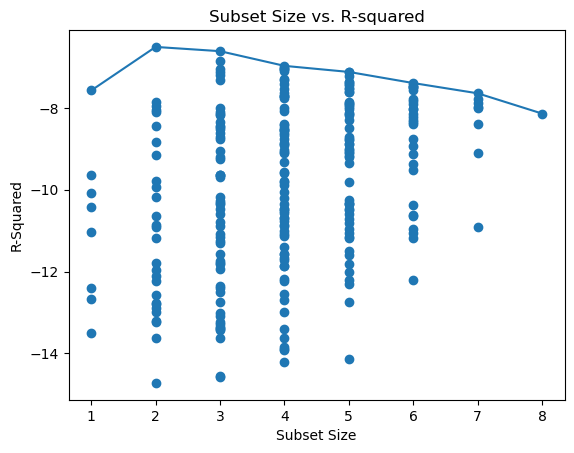

In [21]:
# iterate powerset of features
from sklearn.metrics import r2_score
scores = []
k_vals = []
best_score = -np.Inf + np.zeros(len(features) + 1)
best_features = [[]]
for k in range(1,len(features) + 1):    
    best_features.append([])    
    subs = list(findsubsets(features,k))
    
    # score all combinations of k features
    this_score = np.zeros(len(subs))
    for i in range(len(subs)):
        this_X = X_train[list(subs[i])]        
        cvs = cross_val_score(linear_model.LinearRegression(), 
                             this_X, Y_train, cv=5, scoring='r2')

        scores.append(cvs.mean())
        k_vals.append(k)
        
        # check score
        if cvs.mean() > best_score[k]:
            best_score[k] = cvs.mean()
            best_features[k] = subs[i]

# pick-and-report best features
idx = np.argmax(best_score)
best_features_allsubsets = best_features[idx]
print('Best R2: ', best_score[idx])
print('Best Features: ', best_features_allsubsets)

# show scores
plt.scatter(k_vals, scores)
plt.plot(range(len(features) + 1), best_score)
plt.title('Subset Size vs. R-squared')
plt.xlabel('Subset Size')
plt.ylabel('R-Squared')
plt.show()


In [22]:
display(subs)
display(subs[0])
display(subs[0][0])
display(subs[0])
X_train[list(subs[0])]

[('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')]

('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')

'lcavol'

('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
...,...,...,...,...,...,...,...,...
62,3.246491,4.101817,68,-1.386294,0,-1.386294,6,0
63,2.532903,3.677566,61,1.348073,1,-1.386294,7,15
64,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
65,3.821004,3.896909,44,-1.386294,1,2.169054,7,40


**Excellent**  You have found the best set of features by brute-force search over all possible features.  Good work.

## Problem 3 : Ridge Regression 

### (a)

The problem with brute force search over features is that it doesn't scale well.  We can do it for 8 features, but we can't do it for larger sets of features.  Instead, we will look at a simpler model selection strategy by using L2 regularized linear regression (a.k.a. Ridge Regression).  Do the following in the cell below,
* Learn a Ridge regression model on training data with alpha=0.5
* Report the learned feature weights using the provided printFeatureWeights function

[Documentation - Scikit-Learn - linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [23]:
def printFeatureWeights(f, w):
  for idx in range(len(f)):
    print('%s : %f' % (f[idx], w[idx]))

l2 = linear_model.Ridge(alpha=0.5).fit(X_train, Y_train)
printFeatureWeights(features, l2.coef_[0])


lcavol : 0.576706
lweight : 0.593447
age : -0.018544
lbph : 0.145617
svi : 0.683643
lcp : -0.193621
gleason : -0.034175
pgg45 : 0.009508


### (b)

We chose the regularization coefficient alpha=0.5 somewhat arbitrarily.  We now need to perform model selection in order to learn the best value of alpha.  We will do that by using cross_val_score over a range of values for alpha.  When searching for regularization parameters it is generally good practice to search in log-domain, rather than linear domain.  For example, we will search in the range $[10^{-1}, 10^3]$.  Using Numpy's "logspace" function this corresponds to the range $[-1, 3]$ in log-domain.  In the cell below do the following,
* Create a range of 50 alpha values spaced logarithmically in the range $[10^{-1}, 10^3]$
* Perform 5-fold cross-validation of Ridge regression model for each alpha and record $R^2$ score for each run (there will be 5x50 values)
* Report the best $R^2$ score and the value of alpha that achieves that score
* Use Matplotlib errorbar() function to plot the average $R^2$ with 1 standard deviation error bars for each of the 50 alpha values

[Documentation - Matplotlib - errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)

[Documentation - Numpy - logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html)

Best Alpha:  6.25055192527397


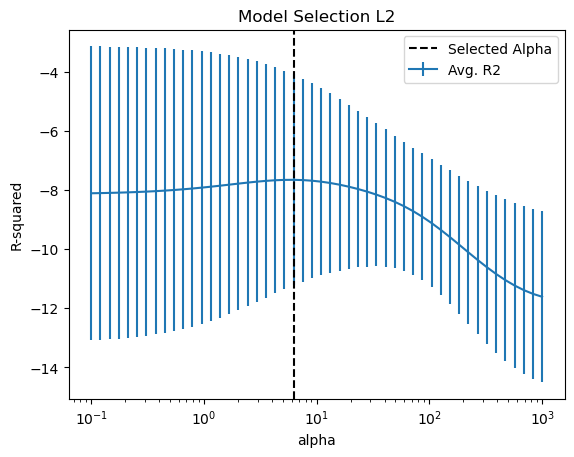

In [24]:
# from sklearn.linear_model import RidgeCV
alphas = np.logspace(-1, 3, num=50)
cv = 5

# do cross-validation
scores = np.zeros((len(alphas), cv))
for idx in range(len(alphas)):
  l2 = linear_model.Ridge(alpha=alphas[idx])
  scores[idx,:] = cross_val_score(l2, X_train, Y_train, cv=cv, scoring='r2')

# select best alpha
mean_r2 = np.mean(scores, axis=1)
std_r2 = np.std(scores, axis=1)
alpha_idx = np.argmax(mean_r2)
best_alpha_l2 = alphas[alpha_idx]
print('Best Alpha: ', best_alpha_l2)
  
# plot
plt.errorbar(alphas, mean_r2, yerr=std_r2, label='Avg. R2')
plt.axvline(best_alpha_l2, linestyle='--', color="k", label="Selected Alpha")
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R-squared')
plt.title('Model Selection L2')
plt.legend()
plt.show()


Now that we have a good model we will look at what it has learned.  Train the Ridge regression model using the selected alpha from the previous cell.  Report the learned feature weights using the printFeatureWeights() function previously provided.

## Problem 4 : LASSO 
Ridge regression performs shrinkage of the weights using the L2 norm.  This will drive some weights *close* to zero, but not exactly zero.  The LASSO method replaces the L2 penalty with an L1 penalty.  Due to properties of L1 discussed in lecture, this has the effect of learning exactly zero weights on some features when it is supported by the data.  In this problem we will repeat procedure of learning a Ridge regression model, but we will instead use LASSO.  Let's start by fitting a LASSO model with a fixed alpha value.  

### (a)

In the cell below do the following,
* Fit LASSO with alpha=0.1
* Use printFeatureWeights() to report the learned feature weights

[Documentation - Scikit-Learn - linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)



In [24]:
l1 = linear_model.Lasso(alpha=0.1).fit(X_train, Y_train)
printFeatureWeights(features, l1.coef_)

lcavol : 0.538986
lweight : 0.184891
age : -0.006352
lbph : 0.128433
svi : 0.000000
lcp : -0.000000
gleason : -0.000000
pgg45 : 0.007727


### (b)

Now we will find a good value of alpha using cross-validation.  Due to differences in how the LASSO model is optimized, there are dedicated methods for performing cross-validation on LASSO.  Scikit-Learn's LassoLarsCV class performs LASSO-specific cross-validation using an optimized [Least Angle Regression](https://en.wikipedia.org/wiki/Least-angle_regression) (LARS) algorithm.  In the cell below do the following,
* Using LassoLarsCV perform 20-fold cross validation to solve all solution paths for Lasso
* Plot mean +/- standard error of **mean squared error** versus regularization coefficient $\alpha$
* Title the plot and axes
* Report the best alpha value and the corresponding average mean squared error from cross-validation

Note: LassoLarsCV returns mean squared error, rather than $R^2$.  It also determines the set of $\alpha$ values automatically, which are stored in the cv_alphas_ attribute.

[Documentation - Scikit-Learn - LassoLarsCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html)

0.011311646934499021


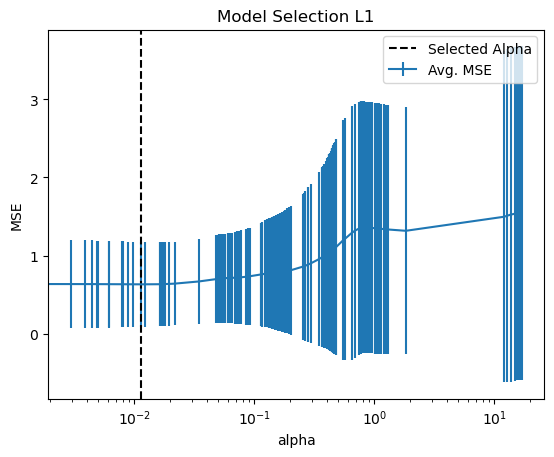

In [14]:
from sklearn.linear_model import LassoLarsCV, LassoCV

l1 = LassoLarsCV(cv=20, normalize=False).fit(X_train, Y_train)

# compute stats
# get mean mse for each fold
mean_mse = l1.mse_path_.mean(axis=-1)
# get standard error of mse for each fold
std_mse = l1.mse_path_.std(axis=-1)
# get best alpha
best_alpha_l1 = l1.alpha_
print(best_alpha_l1)
# plot stuff
plt.errorbar(l1.cv_alphas_, mean_mse, yerr=std_mse, label='Avg. MSE')
plt.axvline(best_alpha_l1, linestyle='--', color="k", label="Selected Alpha")
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Model Selection L1')
plt.legend()
plt.show()

## Problem 5 : Evaluate on Test 

In this problem we will train all of the best performing models chosen by Best Subsets, Ridge Regression, and LASSO.  We will evaluate and compare these models on the test data.  This dataset uses a standard train / test split so we begin by loading test data below.

In [26]:
df_test = pd.read_csv('prostate_test.csv')
df_test.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
1,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
2,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319
3,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,1.398717
4,2.059239,3.501043,60,1.474763,0,1.348073,7,20,1.658228


### (a)

Recall that all of the data are stored in a single table, with the final column being the output 'lpsa'.  Before evaluating on test you must first create X_test and Y_test input/outputs where Y_test is the final column of the DataFrame, and X_test contains all other columns.

In [27]:
X_test = df_test[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
Y_test = df_test['lpsa']

### (b) Best Subsets  
In Problem 2 you found the best subset of features for an ordinary least squares regression model by enumerating all feature subsets.  Using the best selected features train the model below and report mean squared error on the test set.

[Documentation - Scikit-Learn - MeanSquaredError](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [28]:
from sklearn.metrics import mean_squared_error

#train
best_subsets_best = linear_model.LinearRegression()
best_subsets_best.fit(X_train[list(best_features_allsubsets)],Y_train)

#predict
best_subsets_predict =  best_subsets_best.predict(X_test[list(best_features_allsubsets)])

#mse
best_subsets_mse = mean_squared_error(Y_test,best_subsets_predict)
print('Best Subsets MSE : ',best_subsets_mse)

Best Subsets MSE :  0.4924823476805035


### (c) Ridge Regression

In the cell below, train a Ridge Regression model using the optimal regularization coefficient ($\alpha$) found in Problem 2.  Report mean squared error on the test set.

In [29]:
l2_best = linear_model.Ridge(alpha=best_alpha_l2).fit(X_train, Y_train)
l2_predict = l2_best.predict(X_test)
l2_mse = mean_squared_error(Y_test, l2_predict)
print('L2 MSE : ',l2_mse)

L2 MSE :  0.5273494592770833


### (d) LASSO Regression
Now, train and evaluate your final model.  Train a Lasso regression using the optimal $\alpha$ parameters from Problem 3 and report MSE on the test set.

In [30]:
lasso_predict =  l1.predict(X_test)
lasso_mse = mean_squared_error(Y_test, lasso_predict)
print('Lasso MSE : ',lasso_mse)

Lasso MSE :  0.5077062843682019


### (e) Compare feature weights for each model

Now let's compare the feature weight learned by each of the three models.  In the cell below, report the regression weights for each feature under Best Subset, Ridge, and Lasso models evaluated above.  To make the output easier to read, please use a Pandas DataFrame to display the data.  To do this, create a Pandas DataFrame where each column contains regression weights for one of the previous models, and then display that DataFrame in the standard fashion.  You should also provide feature names on each of the rows.

[Documentation - Pandas - DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [31]:
feature_weights_best_subset = list(best_subsets_best.coef_[0])+ ['-']*6 #since the last 6 features are not considered in the model
test_errors_row = {'Features': 'Test Error',
                   'Best Subset': best_subsets_mse, 
                   'Ridge': l2_mse,
                   'LASSO' : lasso_mse
                   }

In [32]:
results_df = pd.DataFrame({'Features':features,
                   'Best Subset': feature_weights_best_subset, 
                   'Ridge': l2_best.coef_[0],
                   'LASSO' : l1.coef_
                   })

results_df = results_df.append(test_errors_row,ignore_index=True).set_index('Features')

In [33]:
results_df

,Best Subset,Ridge,LASSO
Features,,,
lcavol,0.627607,0.550337,0.566300
lweight,0.738375,0.430148,0.572821
age,-,-0.014697,-0.017878
lbph,-,0.154290,0.141910
svi,-,0.387669,0.611769
lcp,-,-0.102993,-0.162829
gleason,-,-0.046865,0.000000
pgg45,-,0.009390,0.008575
Test Error,0.492482,0.527349,0.507706
